# Homework 3: Classification

In [1]:
! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-12 21:06:50--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.002s  

2025-10-12 21:06:50 (42.5 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [53]:
import pandas as pd

df_original = pd.read_csv('course_lead_scoring.csv')
df = pd.read_csv('course_lead_scoring.csv')
display(df.head())

# Verify no missing values
display(df.isnull().sum())

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

# Data preparation
* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0

In [54]:
# Identify categorical and numerical features
numerical_features = []
categorical_features = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numerical_features.append(col)
    else:
        categorical_features.append(col)

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Impute missing values in categorical features with 'NA'
for col in categorical_features:
    df[col].fillna('NA', inplace=True)

# Impute missing values in numerical features with 0.0
for col in numerical_features:
    df[col].fillna(0.0, inplace=True)

Numerical Features: ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']
Categorical Features: ['lead_source', 'industry', 'employment_status', 'location']


/tmp/ipykernel_13390/1010499473.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('NA', inplace=True)
/tmp/ipykernel_13390/1010499473.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [55]:
# Verify no missing values
display(df.isnull().sum())
display(df_original.isnull().sum())

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

# Question 1
What is the most frequent observation (mode) for the column industry?
* `NA`
* `technology`
* `healthcare`
* `retail`

In [28]:
# Show value counts to verify
print("\nValue counts for 'industry':")
print(df['industry'].value_counts().head())

# Find the mode of the 'industry' column
industry_mode = df['industry'].mode()[0]
print(f"\nQ1: Most frequent observation in 'industry': {industry_mode}")


Value counts for 'industry':
industry
retail        203
finance       200
other         198
healthcare    187
education     187
Name: count, dtype: int64

Q1: Most frequent observation in 'industry': retail


# Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

* interaction_count and lead_score
* number_of_courses_viewed and lead_score
* number_of_courses_viewed and interaction_count
* annual_income and interaction_count

Only consider the pairs above when answering this question.

Correlation Matrix:


,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


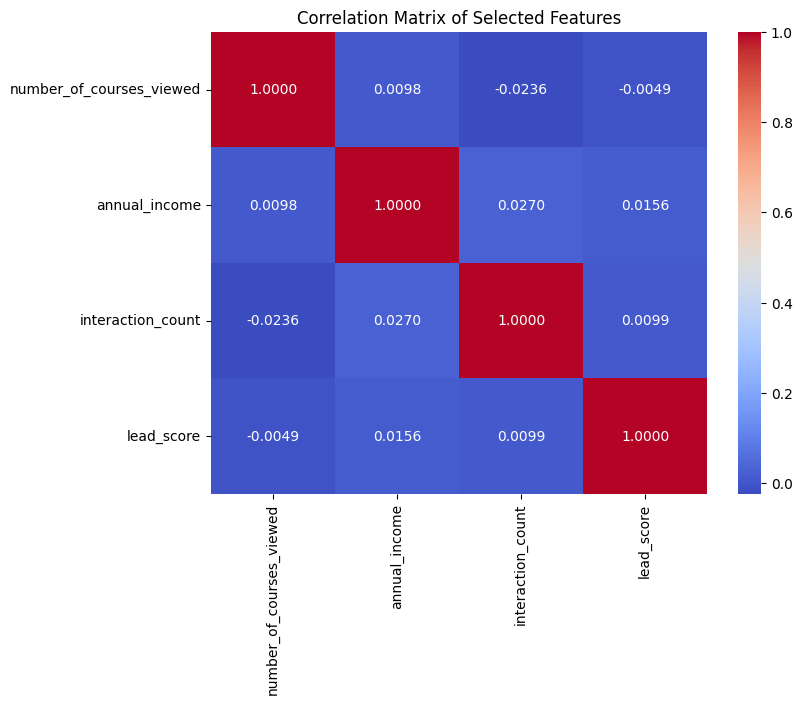


The biggest correlation among the given pairs is between annual_income and interaction_count with a value of 0.0270


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
# correlation_matrix = df[['interaction_count', 'lead_score', 'number_of_courses_viewed', 'annual_income']].corr()
numerical_feature_columns = [col for col in numerical_features if col != 'converted']
correlation_matrix = df[numerical_feature_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Find the biggest correlation among the given pairs
correlation_pairs = {
    'interaction_count and lead_score': correlation_matrix.loc['interaction_count', 'lead_score'],
    'number_of_courses_viewed and lead_score': correlation_matrix.loc['number_of_courses_viewed', 'lead_score'],
    'number_of_courses_viewed and interaction_count': correlation_matrix.loc['number_of_courses_viewed', 'interaction_count'],
    'annual_income and interaction_count': correlation_matrix.loc['annual_income', 'interaction_count']
}

# Find the pair with the maximum absolute correlation
biggest_correlation_pair = max(correlation_pairs, key=lambda k: abs(correlation_pairs[k]))
biggest_correlation_value = correlation_pairs[biggest_correlation_pair]

print(f"\nThe biggest correlation among the given pairs is between {biggest_correlation_pair} with a value of {biggest_correlation_value:.4f}")

# Split the data
* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value y is not in your dataframe.

In [87]:
from sklearn.model_selection import train_test_split

# 1. Define the target variable (X) and features (y)
target = 'converted'
features = df.columns.tolist()
features.remove(target)

X = df[features]
y = df[target]

# 2. First split: Train (60%) and Temp (40%)
# We use test_size=0.4 for the temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# 3. Second split: Validation (50% of Temp, i.e., 20% of total) and Test (50% of Temp, i.e., 20% of total)
# We use test_size=0.5 to split the 40% temporary set 50/50
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Drop the indices to reset them
X_train = X_train.reset_index(drop=True)
X_val   = X_val.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val   = y_val.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# Validate the sizes of the splits
print(f"Train size: {len(X_train)/len(df):.2%}")
print(f"Validation size: {len(X_val)/len(df):.2%}")
print(f"Test size: {len(X_test)/len(df):.2%}")

print(X_train.head())

Train size: 59.99%
Validation size: 19.97%
Test size: 20.04%
      lead_source    industry  number_of_courses_viewed  annual_income  \
0  organic_search  healthcare                         0        69942.0   
1        referral      retail                         2            0.0   
2    social_media      retail                         2        79978.0   
3    social_media  technology                         0        51283.0   
4          events   education                         2        77612.0   

  employment_status       location  interaction_count  lead_score  
0           student         europe                  2        0.50  
1           student      australia                  4        0.14  
2           student      australia                  3        0.14  
3                NA    middle_east                  2        0.57  
4           student  south_america                  2        0.69  


# Question 3
1. Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
2. Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

* industry
* location
* lead_source
* employment_status

In [99]:
from sklearn.metrics import mutual_info_score

# Define a function to calculate mutual information with y_train
def mutual_info(series):
    return mutual_info_score(series, y_train)

# Calculate mutual information for categorical features in the training set using apply
categorical_features = ['industry', 'location', 'lead_source', 'employment_status']
mi = X_train[categorical_features].apply(mutual_info)

# Sort the mutual information scores in descending order
mi_sorted = mi.sort_values(ascending=False).round(2)

# Print the mutual information scores
print("Mutual Information Scores (sorted descending and rounded to 2 decimals):")
display(mi_sorted)

# Find the variable with the biggest mutual information score among the given options
# We can get the first index from the sorted Series
biggest_mi_variable = mi_sorted.index[0]
print(f"\nThe variable with the biggest mutual information score is: {biggest_mi_variable}")

Mutual Information Scores (sorted descending and rounded to 2 decimals):


lead_source          0.03
industry             0.01
employment_status    0.01
location             0.00
dtype: float64


The variable with the biggest mutual information score is: lead_source


# Question 4
1. Now let's train a logistic regression.  
2. Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.  
3. Fit the model on the training dataset.  
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:  
    * `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
4. Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?
- 0.64
- 0.74
- 0.84
- 0.94

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 3. One-Hot Encoding (OHE) и выравнивание столбцов
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_features, drop_first=True)

In [101]:
X_train_encoded

,number_of_courses_viewed,annual_income,interaction_count,lead_score,industry_education,industry_finance,industry_healthcare,industry_manufacturing,industry_other,industry_retail,...,location_south_america,lead_source_events,lead_source_organic_search,lead_source_paid_ads,lead_source_referral,lead_source_social_media,employment_status_employed,employment_status_self_employed,employment_status_student,employment_status_unemployed
0,0,69942.0,2,0.50,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,2,0.0,4,0.14,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
2,2,79978.0,3,0.14,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
3,0,51283.0,2,0.57,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2,77612.0,2,0.69,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,0,62384.0,4,0.82,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
873,3,69299.0,4,0.39,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
874,1,45257.0,3,0.47,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,False,False
875,0,59878.0,4,0.85,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Identify categorical features (assuming 'categorical_features' list is available)
# If not defined, you would need to add code here to identify them.
# For example:
# categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical variables (fit on training!)
X_train_enc = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_val_enc = pd.get_dummies(X_val, columns=categorical_features, drop_first=True)

# Align columns to handle any missing columns after encoding
# This is important if some categories are present in the validation set but not in the training set
X_val_enc = X_val_enc.reindex(columns=X_train_enc.columns, fill_value=0)

# Logistic Regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

# Fit the model on the training dataset
model.fit(X_train_enc, y_train)

# Make predictions on the validation dataset
y_pred = model.predict(X_val_enc)

# Calculate accuracy on validation set
accuracy = accuracy_score(y_val, y_pred)

# Round the accuracy to 2 decimal digits
round_acc = round(accuracy, 2)

print(f"Accuracy on the validation dataset using pd.get_dummies: {round_acc}")

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# One-hot encode categorical variables (fit on training!)
X_train_enc = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_val_enc = pd.get_dummies(X_val, columns=categorical_features, drop_first=True)

# Align columns to handle any missing columns after encoding
X_val_enc = X_val_enc.reindex(columns=X_train_enc.columns, fill_value=0)

# Logistic Regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_enc, y_train)
y_pred = model.predict(X_val_enc)

# Calculate accuracy on validation set
accuracy = accuracy_score(y_val, y_pred)
round_acc = round(accuracy, 2)
round_acc

0.68